In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# define the file path
file_path = r"C:\Users\peppi\OneDrive - Turun ammattikorkeakoulu\Own projects\Marketing analyst\internet-advertisements-data\internet-advertisements-data.csv"

In [3]:
# load the dataset
df = pd.read_csv(file_path, header=None, na_values="?")

In [4]:
# remove missing values
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [5]:
# ensure all columns are converted to numeric except the target variable
df.iloc[:, :-1] = df.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')

In [6]:
# ensure the target variable is string-free and clean
df.iloc[:, -1] = df.iloc[:, -1].astype(str).str.strip()

In [7]:
# dataset Summary
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3264 entries, 1 to 3279
Columns: 1560 entries, 0 to 1559
dtypes: float64(2), int64(1554), object(4)
memory usage: 38.9+ MB
None

Basic Statistics:
              0            4            5            6            7     \
count  3264.000000  3264.000000  3264.000000  3264.000000  3264.000000   
mean   1642.118566     0.767157     0.004289     0.011642     0.004596   
std     946.836432     0.422708     0.065362     0.107285     0.067645   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     821.750000     1.000000     0.000000     0.000000     0.000000   
50%    1644.500000     1.000000     0.000000     0.000000     0.000000   
75%    2462.250000     1.000000     0.000000     0.000000     0.000000   
max    3278.000000     1.000000     1.000000     1.000000     1.000000   

              8            9            10           11           12    ...  \
count  3264.000000  3264.000000  3264.000000  32


Class Distribution:
1559
nonad.    2810
ad.        454
Name: count, dtype: int64


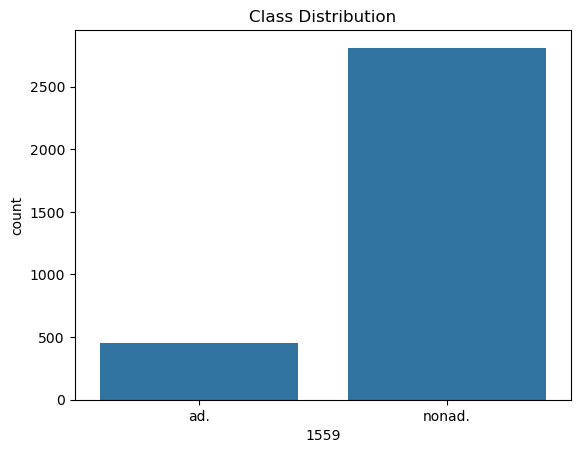

In [8]:
# class balance
print("\nClass Distribution:")
print(df.iloc[:, -1].value_counts())
sns.countplot(x=df.iloc[:, -1])
plt.title("Class Distribution")
plt.show()

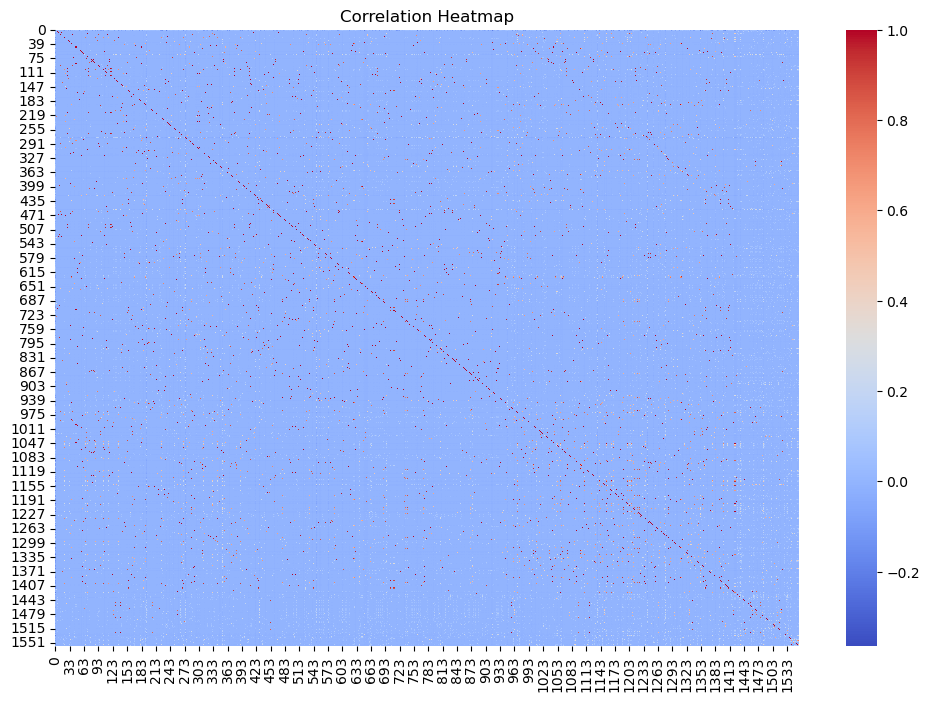

In [9]:
# correlation Heatmap
df_numeric = df.select_dtypes(include=['number'])
if not df_numeric.empty:
    plt.figure(figsize=(12, 8))
    corr_matrix = df_numeric.corr()
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns available for correlation analysis.")

In [10]:
# split into Features and Target
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]

In [11]:
# encode target variable
y = pd.factorize(y)[0]

In [12]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# train a random forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# evaluate the Model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       1.00      1.00      1.00       827

    accuracy                           1.00       980
   macro avg       0.99      1.00      0.99       980
weighted avg       1.00      1.00      1.00       980



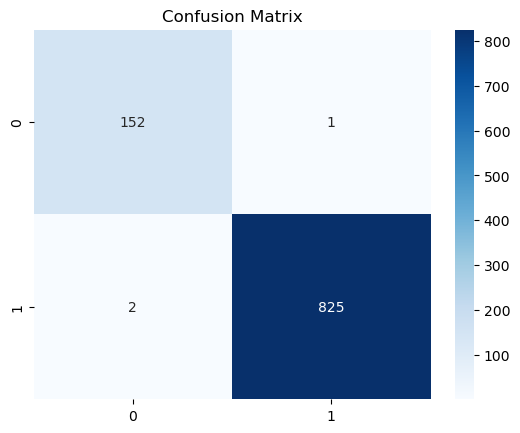

In [15]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

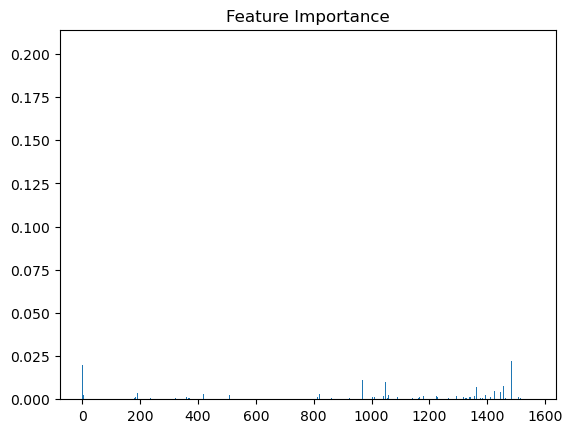

In [16]:
# feature importance
importance = model.feature_importances_
plt.bar(range(len(importance)), importance)
plt.title("Feature Importance")
plt.show()